In [1]:
import numpy as np
import xarray as xr
import matplotlib.pyplot as plt
import scipy.fftpack as fft
from scipy.signal import detrend

%matplotlib inline

In [4]:
V = xr.open_dataset('https://salishsea.eos.ubc.ca/erddap/griddap/ubcSSn3DvVelocity1hV16-10')
mask = xr.open_dataset('/data/bmoorema/MEOPAR/NEMO-forcing/grid/mesh_mask201702.nc')
grid = xr.open_dataset('/data/bmoorema/MEOPAR/NEMO-forcing/grid/bathymetry_201702.nc')

In [32]:
timerange = ['2016 Dec 1 00:00', '2017 Jan 31 00:00']

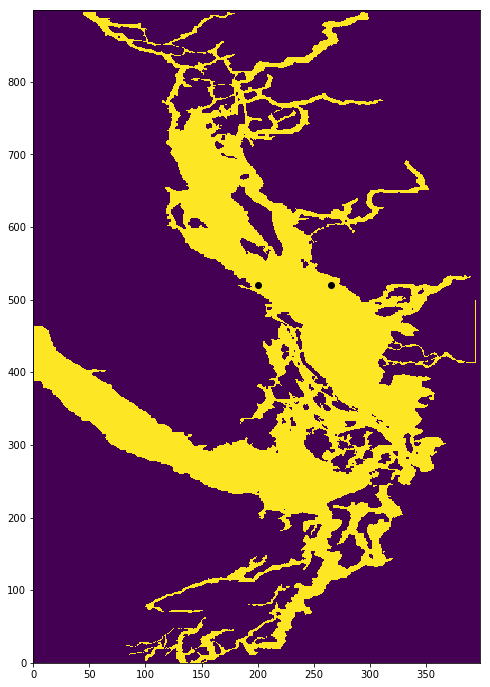

In [15]:
fig, ax = plt.subplots(1, 1, figsize=(8, 12))
ax.pcolormesh(mask.vmask.isel(t=0, z=0))
ax.plot(200, 520, 'ko')
ax.plot(265, 520, 'ko')

In [33]:
v = V.vVelocity.isel(gridX=200, gridY=520, depth=0).sel(time=slice(*timerange)).values

In [34]:
y = detrend(v, type='constant')
yf = fft.fftshift(np.abs(fft.fft(y)))
xf = fft.fftshift(fft.fftfreq(y.shape[0], d=1/24))

(0, 3)

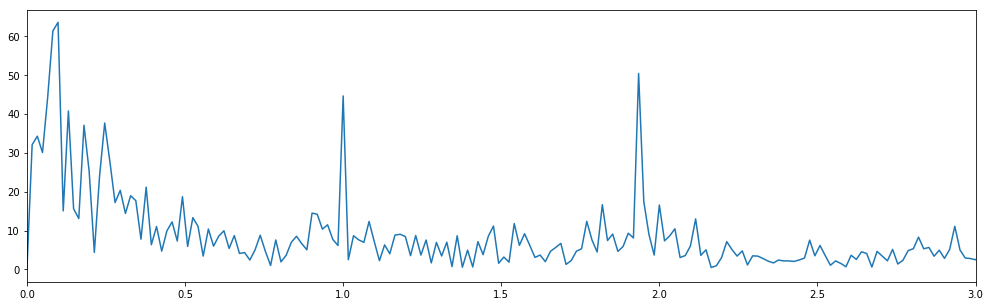

In [35]:
fig, ax = plt.subplots(1, 1, figsize=(17, 5))
ax.plot(xf, yf)
ax.set_xlim([0, 3])